In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')

In [4]:
# 데이터 묶기 + 사용 컬럼만 빼내기
data = pd.concat([data1,data2])
column_m, column_n,column_o, column_z  = '수축기혈압','이완기혈압','식전혈당(공복혈당)','흡연상태'
data = data[[column_m, column_n,column_o, column_z]]

In [5]:
data

,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태
0,120.0,80.0,99.0,1.0
1,130.0,82.0,106.0,3.0
2,120.0,70.0,98.0,1.0
3,145.0,87.0,95.0,1.0
4,138.0,82.0,101.0,1.0
...,...,...,...,...
999995,110.0,70.0,107.0,1.0
999996,136.0,88.0,114.0,1.0
999997,162.0,90.0,98.0,2.0
999998,140.0,98.0,94.0,2.0


## Null 개수 확인


In [6]:
data.isnull().sum()
notnull_data = data.dropna(axis =0)

print(data)
print(notnull_data)


        수축기혈압  이완기혈압  식전혈당(공복혈당)  흡연상태
0       120.0   80.0        99.0   1.0
1       130.0   82.0       106.0   3.0
2       120.0   70.0        98.0   1.0
3       145.0   87.0        95.0   1.0
4       138.0   82.0       101.0   1.0
...       ...    ...         ...   ...
999995  110.0   70.0       107.0   1.0
999996  136.0   88.0       114.0   1.0
999997  162.0   90.0        98.0   2.0
999998  140.0   98.0        94.0   2.0
999999  120.0   80.0        85.0   1.0

[2000000 rows x 4 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)  흡연상태
0       120.0   80.0        99.0   1.0
1       130.0   82.0       106.0   3.0
2       120.0   70.0        98.0   1.0
3       145.0   87.0        95.0   1.0
4       138.0   82.0       101.0   1.0
...       ...    ...         ...   ...
999995  110.0   70.0       107.0   1.0
999996  136.0   88.0       114.0   1.0
999997  162.0   90.0        98.0   2.0
999998  140.0   98.0        94.0   2.0
999999  120.0   80.0        85.0   1.0

[1993626 rows x 4 columns]


## 이상치 제거
 - 식전혈당 300 이상 데이터 제거
 - 혈당 300이상 + 220 /60 수축기, 140/40 이완기 데이터 제거

In [7]:
notnull_lower_300_data = notnull_data[notnull_data[column_o]<=300]
sys_cut_data = notnull_lower_300_data[(notnull_lower_300_data[column_m] >= 60) & (notnull_lower_300_data[column_m] <= 220)]
dias_cut_data = sys_cut_data[(sys_cut_data[column_n] >= 40) & (sys_cut_data[column_n] <= 140)]
print(notnull_lower_300_data)
data = dias_cut_data
print(data)


        수축기혈압  이완기혈압  식전혈당(공복혈당)  흡연상태
0       120.0   80.0        99.0   1.0
1       130.0   82.0       106.0   3.0
2       120.0   70.0        98.0   1.0
3       145.0   87.0        95.0   1.0
4       138.0   82.0       101.0   1.0
...       ...    ...         ...   ...
999995  110.0   70.0       107.0   1.0
999996  136.0   88.0       114.0   1.0
999997  162.0   90.0        98.0   2.0
999998  140.0   98.0        94.0   2.0
999999  120.0   80.0        85.0   1.0

[1990562 rows x 4 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)  흡연상태
0       120.0   80.0        99.0   1.0
1       130.0   82.0       106.0   3.0
2       120.0   70.0        98.0   1.0
3       145.0   87.0        95.0   1.0
4       138.0   82.0       101.0   1.0
...       ...    ...         ...   ...
999995  110.0   70.0       107.0   1.0
999996  136.0   88.0       114.0   1.0
999997  162.0   90.0        98.0   2.0
999998  140.0   98.0        94.0   2.0
999999  120.0   80.0        85.0   1.0

[1990388 rows x 4 columns]


In [8]:
diabetes = data[data[column_o] >= 126]
diabetes

,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태
11,109.0,69.0,137.0,2.0
37,167.0,84.0,128.0,1.0
75,149.0,90.0,155.0,1.0
76,130.0,80.0,160.0,2.0
85,120.0,74.0,140.0,3.0
...,...,...,...,...
999936,114.0,62.0,137.0,2.0
999940,146.0,101.0,143.0,1.0
999942,132.0,66.0,150.0,1.0
999977,132.0,96.0,160.0,2.0


전체 인원(널제거, 공복혈당 300이상 제거) : 1990388
당뇨 인원 : 152785

In [9]:
total_people = 1990388
total_dia = 152785

p_diabetes = total_dia/total_people
p_not_diabetes = (total_people - total_dia)/total_people

print("당뇨 확률 : %f, 당뇨x 확률 : %f" % (p_diabetes,p_not_diabetes))
P = np.array([p_diabetes,p_not_diabetes])

당뇨 확률 : 0.076761, 당뇨x 확률 : 0.923239


# H(parent) 계산

In [10]:
h_parent = - ((P[0]*np.log2(P[0]))+ (P[1] * np.log2(P[1])))

print("H(parent) (당뇨병 엔트로피) : %f"%(h_parent))
h_parent

H(parent) (당뇨병 엔트로피) : 0.390664


0.39066374732574616

In [11]:
# Function compute Entropy
def H(p):
    id_p = np.where(p != 0)
    return -np.sum(p[id_p]*np.log2(p[id_p]))




# Compute H(X)
# Expected result: H = 1.27985422583
print ("H = ", H(P))

H =  0.39066374732574616


# 흡연 여부 엔트로피

In [12]:
z1_people = len(data[data[column_z] == 1])
z2_people = len(data[data[column_z] == 2])
z3_people = len(data[data[column_z] == 3])

In [13]:
print( "흡연1 : %d 흡연2 : %d 흡연3 : %d 흡연 총 인원 : %d" % (z1_people,z2_people,z3_people, z1_people+z2_people+z3_people))

흡연1 : 1209391 흡연2 : 352982 흡연3 : 428015 흡연 총 인원 : 1990388


In [14]:
z1_dia = len(data[(data[column_z] == 1) & (data[column_o] >= 126)])
z1_not_dia = len(data[(data[column_z] == 1) & (data[column_o] < 126)])
z2_dia = len(data[(data[column_z] == 2) & (data[column_o] >= 126)])
z2_not_dia = len(data[(data[column_z] == 2) & (data[column_o] < 126)])
z3_dia = len(data[(data[column_z] == 3) & (data[column_o] >= 126)])
z3_not_dia = len(data[(data[column_z] == 3) & (data[column_o] < 126)])

In [15]:
print("흡연여부:1, 당뇨인 사람 = %d, 당뇨x인 사람 = %d" %(z1_dia, z1_not_dia))
print("흡연여부:2, 당뇨인 사람 = %d, 당뇨x인 사람 = %d" %(z2_dia, z2_not_dia))
print("흡연여부:3, 당뇨인 사람 = %d, 당뇨x인 사람 = %d" %(z3_dia, z3_not_dia))

흡연여부:1, 당뇨인 사람 = 75897, 당뇨x인 사람 = 1133494
흡연여부:2, 당뇨인 사람 = 37179, 당뇨x인 사람 = 315803
흡연여부:3, 당뇨인 사람 = 39709, 당뇨x인 사람 = 388306


## H(children) 계산
 

In [16]:
p_z1_dia = z1_dia/z1_people
p_z1_not_dia = (z1_people - z1_dia) / z1_people
p_z2_dia = z2_dia/z2_people
p_z2_not_dia = (z2_people - z2_dia) / z2_people
p_z3_dia = z3_dia/z3_people
p_z3_not_dia = (z3_people - z3_dia) / z3_people

p_z1 = z1_people/total_people
p_z2 = z2_people/total_people
p_z3 = z3_people/total_people

In [17]:
h_z1 = - ((p_z1_dia*np.log2(p_z1_dia))+ (p_z1_not_dia* np.log2(p_z1_not_dia)))
h_z2 = - ((p_z2_dia*np.log2(p_z2_dia))+ (p_z2_not_dia* np.log2(p_z2_not_dia)))
h_z3 = - ((p_z3_dia*np.log2(p_z3_dia))+ (p_z3_not_dia* np.log2(p_z3_not_dia)))

print("H(z1): %f"%(h_z1))
print("H(z2): %f"%(h_z2))
print("H(z3): %f"%(h_z3))

H(z1): 0.338291
H(z2): 0.485662
H(z3): 0.445664


## IG(Information Gain) 계산
: 질문) 계산할 때 확률 부분이 'z1 && 당뇨/z1인 사람' 이게 맞을까요? 'z1인 사람/ 전체 사람' 이게 맞을까요?
 둘 다 해볼께요..
  두번째가 맞는듯

In [18]:
z_IG_1 = h_parent - ((p_z1_dia *h_z1) + (p_z2_dia *h_z2) +(p_z2_dia *h_z2))
z_IG_2 = h_parent - ((p_z1 * h_z1) +(p_z2 * h_z2)+(p_z3 * h_z3))
 
print(z_IG_1, z_IG_2)

0.2671259330594141 0.003147859406958775


# 수축/이완 혈압 엔트로피
 ~혈압 기준은 두 세가지 정도 있는데 추후에 다른 기준으로 분리해서 해보려고 함~
 일단 그냥 +20 씩 분류할께요


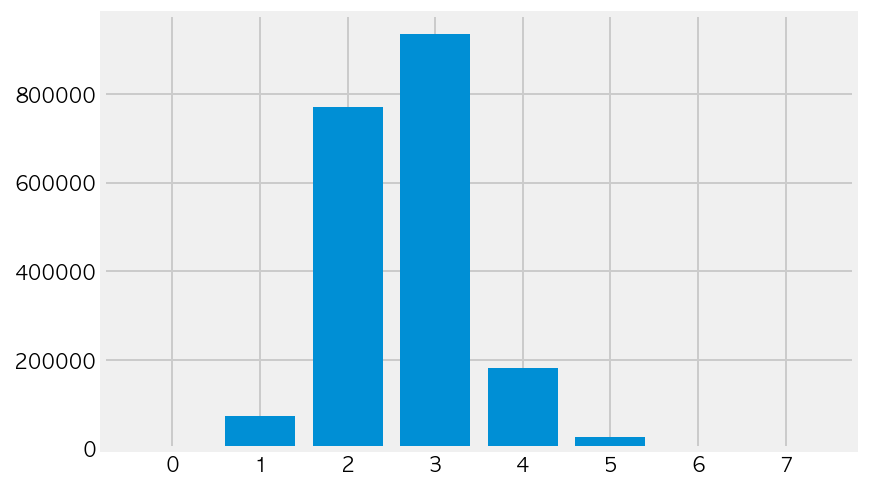

수축기혈압 전체 인원 분포 [   103  73036 770312 934401 181663  27103   3349    421] True


In [19]:
# 고혈합 분류법
# only_bp = data[(data[column_m] >= 140) & (data[column_n] < 90)]

# lv2_bp = data[(data[column_m] >= 160) | (data[column_n] >= 100)]

# lv1_bp = data[((data[column_m] >= 140) & (data[column_m] <= 159)) |
#               ((data[column_n] >= 90) & (data[column_n] <= 99))]

# lv0_bp = data[((data[column_m] >= 130) & (data[column_m] <= 139)) |
#               ((data[column_n] >= 80) & (data[column_n] <= 89))]

# warn_bp = data[((data[column_m] >= 120) & (data[column_m] <= 129)) &
#               (data[column_n] < 80)]

# normal_bp = data[((data[column_m] >= 90) & (data[column_m] < 120)) & 
#               ((data[column_n] >= 60) & (data[column_n] < 80))]

# low_bp = data[(data[column_m] < 90) & (data[column_n] < 60)]

# 단순히 범위로 수축기: 60~220(+20) , 이완기: 40~140 (+15, 마지막만 +10)
sys_lv0 = data[(data[column_m] >= 60) & (data[column_m] < 80)]
sys_lv1 = data[(data[column_m] >= 80) & (data[column_m] < 100)]
sys_lv2 = data[(data[column_m] >= 100) & (data[column_m] < 120)]
sys_lv3 = data[(data[column_m] >= 120) & (data[column_m] < 140)]
sys_lv4 = data[(data[column_m] >= 140) & (data[column_m] < 160)]
sys_lv5 = data[(data[column_m] >= 160) & (data[column_m] < 180)]
sys_lv6 = data[(data[column_m] >= 180) & (data[column_m] < 200)]
sys_lv7 = data[(data[column_m] >= 200) & (data[column_m] <= 220)]

sys_len = np.array([len(sys_lv0),len(sys_lv1),len(sys_lv2),len(sys_lv3),
                   len(sys_lv4),len(sys_lv5),len(sys_lv6),len(sys_lv7)])
sys_x = range(len(sys_len))
plt.bar(sys_x,sys_len)
plt.show()
print("수축기혈압 전체 인원 분포",sys_len, sys_len.sum() == total_people)


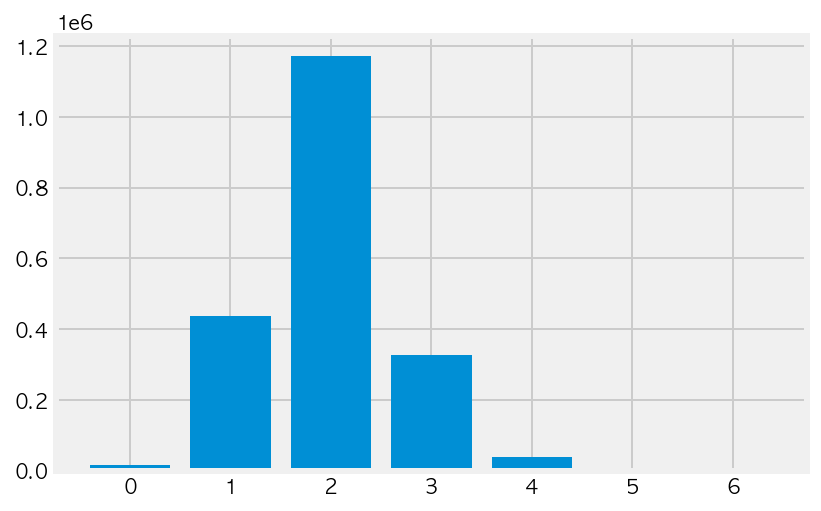

이완기혈압 전체 인원 분포 [  14482  437070 1171540  326398   38031    2500     367] True


In [20]:
dias_lv0 = data[(data[column_n] >= 40) & (data[column_n] < 55)]
dias_lv1 = data[(data[column_n] >= 55) & (data[column_n] < 70)]
dias_lv2 = data[(data[column_n] >= 70) & (data[column_n] < 85)]
dias_lv3 = data[(data[column_n] >= 85) & (data[column_n] < 100)]
dias_lv4 = data[(data[column_n] >= 100) & (data[column_n] < 115)]
dias_lv5 = data[(data[column_n] >= 115) & (data[column_n] < 130)]
dias_lv6 = data[(data[column_n] >= 130) & (data[column_n] <= 140)]


dias_len = np.array([len(dias_lv0),len(dias_lv1),len(dias_lv2),len(dias_lv3),
                   len(dias_lv4),len(dias_lv5),len(dias_lv6)])
dias_x = range(len(dias_len))
plt.bar(dias_x,dias_len)
plt.show()
print("이완기혈압 전체 인원 분포",dias_len, dias_len.sum() == total_people)

In [21]:
sys_lv0_diab = sys_lv0[sys_lv0[column_o]>=126]
sys_lv1_diab = sys_lv1[sys_lv1[column_o]>=126]
sys_lv2_diab = sys_lv2[sys_lv2[column_o]>=126]
sys_lv3_diab = sys_lv3[sys_lv3[column_o]>=126]
sys_lv4_diab = sys_lv4[sys_lv4[column_o]>=126]
sys_lv5_diab = sys_lv5[sys_lv5[column_o]>=126]
sys_lv6_diab = sys_lv6[sys_lv6[column_o]>=126]
sys_lv7_diab = sys_lv7[sys_lv7[column_o]>=126]

dias_lv0_diab = dias_lv0[dias_lv0[column_o]>=126]
dias_lv1_diab = dias_lv1[dias_lv1[column_o]>=126]
dias_lv2_diab = dias_lv2[dias_lv2[column_o]>=126]
dias_lv3_diab = dias_lv3[dias_lv3[column_o]>=126]
dias_lv4_diab = dias_lv4[dias_lv4[column_o]>=126]
dias_lv5_diab = dias_lv5[dias_lv5[column_o]>=126]
dias_lv6_diab = dias_lv6[dias_lv6[column_o]>=126]


sys_diab_len = np.array([len(sys_lv0_diab),len(sys_lv1_diab),len(sys_lv2_diab),
                         len(sys_lv3_diab), len(sys_lv4_diab),len(sys_lv5_diab),
                         len(sys_lv6_diab),len(sys_lv7_diab)])
dias_diab_len = np.array([len(dias_lv0_diab),len(dias_lv1_diab),
                          len(dias_lv2_diab),len(dias_lv3_diab),
                          len(dias_lv4_diab),len(dias_lv5_diab),len(dias_lv6_diab)])

print(sys_len)
print(sys_diab_len, sys_diab_len.sum())
print(dias_len)
print(dias_diab_len, dias_diab_len.sum())
## sys_diab_len.sum() == dias_diab_len.sum() == 당뇨병 인원

[   103  73036 770312 934401 181663  27103   3349    421]
[    3  1821 35449 83416 26611  4763   653    69] 152785
[  14482  437070 1171540  326398   38031    2500     367]
[  655 21343 91270 34202  4883   380    52] 152785


### 확률 구하기

In [22]:
px1=[0 for _ in range(len(sys_len))] 
py1=[0 for _ in range(len(sys_len))] 
for i in range(len(sys_len)):
    px1[i] = sys_diab_len[i] / sys_len[i]
    py1[i] = (sys_len[i] - sys_diab_len[i]) / sys_len[i]

print("수축기 당뇨 확률: ",px1)
print("수축기 정상 확률: ",py1)

px2=[0 for _ in range(len(dias_len))] 
py2=[0 for _ in range(len(dias_len))] 
for i in range(len(dias_len)):
    px2[i] = dias_diab_len[i] / dias_len[i]
    py2[i] = (dias_len[i] - dias_diab_len[i]) / dias_len[i]

print("이완기 당뇨 확률: ",px2)
print("이완기 정상 확률: ",py2)

수축기 당뇨 확률:  [0.02912621359223301, 0.024932909797907882, 0.04601901567157204, 0.08927216473441274, 0.1464855253959254, 0.17573700328376932, 0.19498357718722006, 0.16389548693586697]
수축기 정상 확률:  [0.970873786407767, 0.9750670902020921, 0.9539809843284279, 0.9107278352655872, 0.8535144746040746, 0.8242629967162307, 0.80501642281278, 0.836104513064133]
이완기 당뇨 확률:  [0.04522855959121668, 0.04883199487496282, 0.07790600406302815, 0.10478618128787553, 0.12839525650127528, 0.152, 0.14168937329700274]
이완기 정상 확률:  [0.9547714404087834, 0.9511680051250372, 0.9220939959369718, 0.8952138187121245, 0.8716047434987247, 0.848, 0.8583106267029973]


In [23]:
sys_entropy = []

for x,y in zip(px1,py1):
    P = np.array([x,y])
    print(P)
    print(H(P))
    sys_entropy.append(H(P))


print("수축기혈압 엔트로피 : ")
for i in range(len(sys_len)):
    print("lv%d = %f" % (i,sys_entropy[i]))


[0.02912621 0.97087379]
0.18999075553626754
[0.02493291 0.97506709]
0.1683061994731502
[0.04601902 0.95398098]
0.26923904364961826
[0.08927216 0.91072784]
0.4340357206412661
[0.14648553 0.85351447]
0.6009749954631391
[0.175737 0.824263]
0.6706618294011848
[0.19498358 0.80501642]
0.7117810758706125
[0.16389549 0.83610451]
0.6435478784630176
수축기혈압 엔트로피 : 
lv0 = 0.189991
lv1 = 0.168306
lv2 = 0.269239
lv3 = 0.434036
lv4 = 0.600975
lv5 = 0.670662
lv6 = 0.711781
lv7 = 0.643548


In [24]:
dias_entropy = []
for x,y in zip(px2,py2):
    P = np.array([x,y])
    print(P)
    print(H(P))
    dias_entropy.append(H(P))


print("이완기혈압 엔트로피 : ")
for i in range(len(dias_len)):
    print("lv%d = %f" % (i,dias_entropy[i]))

[0.04522856 0.95477144]
0.26577153576502643
[0.04883199 0.95116801]
0.28141448371513106
[0.077906 0.922094]
0.3947575435909049
[0.10478618 0.89521382]
0.48398636839174347
[0.12839526 0.87160474]
0.5530206875307276
[0.152 0.848]
0.6148227571490692
[0.14168937 0.85831063]
0.5886460862619332
이완기혈압 엔트로피 : 
lv0 = 0.265772
lv1 = 0.281414
lv2 = 0.394758
lv3 = 0.483986
lv4 = 0.553021
lv5 = 0.614823
lv6 = 0.588646


In [25]:
p_sys = []
p_dias = []


for i in range(len(sys_len)):
    p_sys.append(sys_len[i] / total_people)


for i in range(len(dias_len)):
    p_dias.append(dias_len[i] / total_people)
    

print(p_sys)
print(p_dias)

arr_p_sys = np.array(p_sys)
arr_p_dias = np.array(p_dias)
# bp_arr = np.array([len(low_bp),len(normal_bp),len(warn_bp),len(lv0_bp),len(lv1_bp),len(lv2_bp),len(only_bp)])
# px = np.array(bp_arr/total_people)
# print (px)

[5.174870427273476e-05, 0.03669435306081025, 0.38701599889066857, 0.4694567089431809, 0.09127014431357103, 0.013616943028193497, 0.0016825865107707642, 0.00021151654853224596]
[0.007275968303667425, 0.21959035122800177, 0.5885988058609678, 0.16398712210885516, 0.01910732982714928, 0.0012560365114741448, 0.00018438615988440444]


In [26]:
sys_IG = h_parent - sum(arr_p_sys * sys_entropy)
print("수축기혈압 정보증가량 : ", sys_IG)

dias_IG = h_parent - sum(arr_p_dias * dias_entropy)
print("이완기혈압 정보증가량 : ", dias_IG)

수축기혈압 정보증가량 :  0.011200037300218568
이완기혈압 정보증가량 :  0.003765219580828927


 : 다음과 같은 정보증가량을 구할 수 있고, 이를 기반으로 수축기 혈압의 정보가 더 중요하다고 고려할 수 있다.
